In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# K- Mean Clustering

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

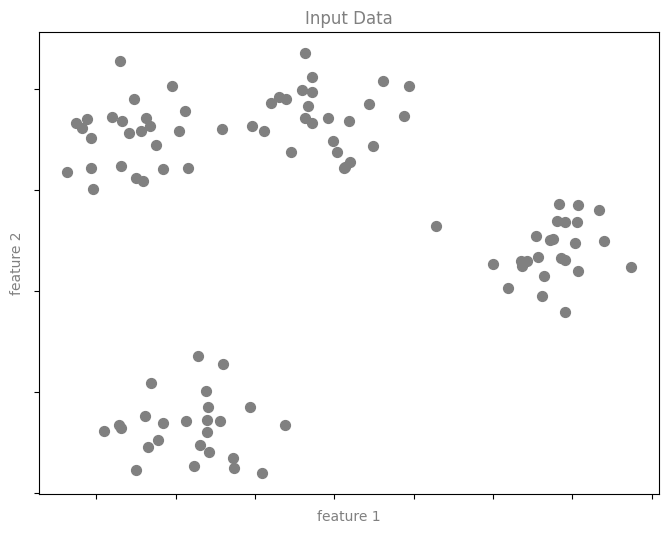

In [9]:
# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

# show the plot
plt.show()

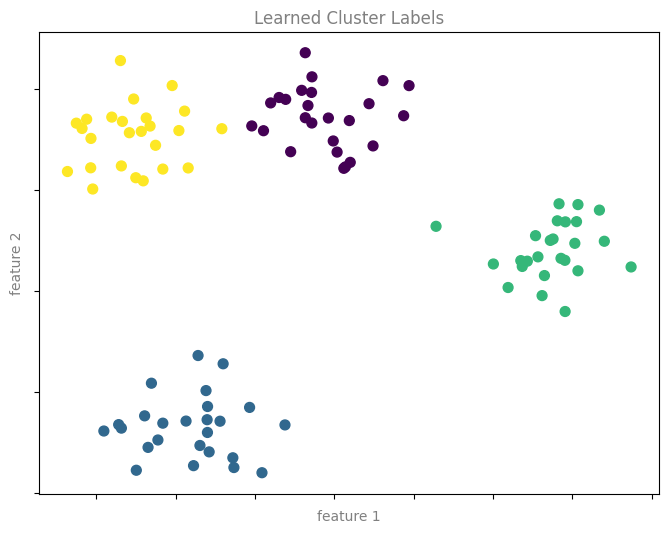

In [10]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')
plt.show()

# Hierarchical Clustering

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [12]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# Turn the data into a set of points:
data = list(zip(x, y))

print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


Compute the linkage between all of the different points. Here we use a simple euclidean distance measure and Ward's linkage, which seeks to minimize the variance between clusters.

In [14]:
linkage_data = linkage(data, method='ward', metric='euclidean')


Finally, plot the results in a dendrogram. This plot will show us the hierarchy of clusters from the bottom (individual points) to the top (a single cluster consisting of all data points).

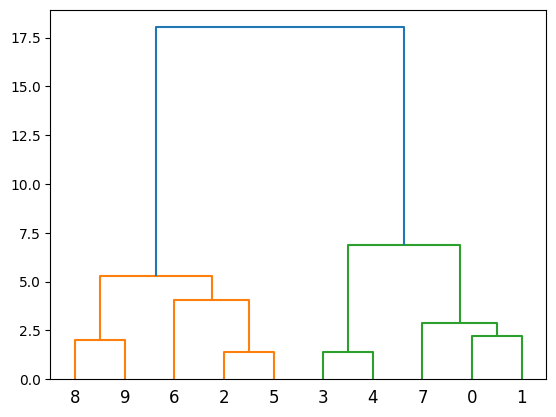

In [15]:
dendrogram(linkage_data)
plt.show()

The scikit-learn library allows us to use hierarchichal clustering in a different manner. First, we initialize the AgglomerativeClustering class with 2 clusters, using the same euclidean distance and Ward linkage.

The .fit_predict method can be called on our data to compute the clusters using the defined parameters across our chosen number of clusters.

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance with metric instead of deprecated affinity
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Fit the model and predict cluster labels
labels = hierarchical_cluster.fit_predict(data)

# Print the cluster labels
print(labels)


[0 0 1 0 0 1 1 0 1 1]


Finally, if we plot the same data and color the points using the labels assigned to each index by the hierarchical clustering method, we can see the cluster each point was assigned to:

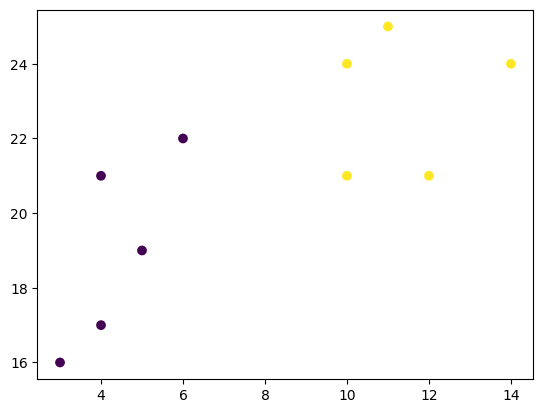

In [22]:
plt.scatter(x, y, c=labels)
plt.show()